<a href="https://colab.research.google.com/github/evitts1989/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Corey_Evitts_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df_orig = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_orig.shape)
df_orig.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df=df_orig.copy()

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [3]:
df = df.drop('diagnosis', axis=1).drop('Unnamed: 32',axis=1).drop('id',axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 30)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [5]:
cancer= df.copy()
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Initial data exploration

cancer.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
cancer.isnull().sum().head(3)

radius_mean       0
texture_mean      0
perimeter_mean    0
dtype: int64

In [8]:
cancer.dtypes.head(3)

radius_mean       float64
texture_mean      float64
perimeter_mean    float64
dtype: object

In [0]:
# pick two features to initialize clustering.
features = ['concave points_mean', 'symmetry_mean']

In [10]:
cancer_points=cancer.loc[:, 'concave points_mean':'symmetry_mean']
cancer_points.head()

,concave points_mean,symmetry_mean
0,0.14710,0.2419
1,0.07017,0.1812
2,0.12790,0.2069
3,0.10520,0.2597
4,0.10430,0.1809


In [0]:
# Using a function to generate an "elbow" graph

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cancer_points)
    sum_of_squared_distances.append(km.inertia_)


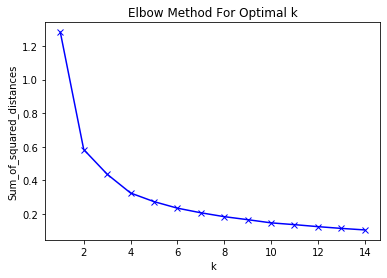

In [12]:
# Plotting a Scree Plot to estimake k

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Perform K-Means Clustering on the Dataset

In [0]:
# Instantiate the sklearn class, and pick a number of clusters.
kmeans = KMeans(n_clusters=2)

In [14]:
# fit the instantiate model to our data.
kmeans.fit(cancer_points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# the labels are the same as the 3 centers.
labels = kmeans.labels_


In [0]:
# using the metrics module 
from sklearn import metrics

In [17]:
#Computing the silhouette score?

metrics.silhouette_score(cancer_points, labels, metric='euclidean')

0.5134098735058062

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 2
cancer_model1 = KMeans(n_clusters=k, max_iter=1)

In [19]:
# Fit the instantiated model to our sliced dataframe
cancer_model1.fit(cancer_points[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# Assign clusters back to our dataframe
cancer_points['cluster'] = cancer_model1.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Get our centroids
centroids= cancer_model1.cluster_centers_

In [22]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,0.026646,0.172216
1,0.096280,0.200184


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g']
colors       =  [base_colors[centroid] for centroid in cancer_model1.labels_]

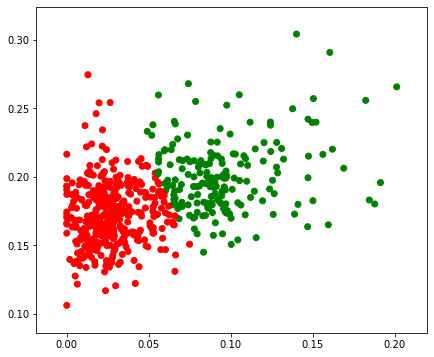

In [24]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_points[features[0]], cancer_points[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [25]:
# what's our silhouette score?
metrics.silhouette_score(cancer_points, cancer_model1.labels_, metric='euclidean')

0.9618597207666872

In [26]:
# What is the predicted centroid for each data point?  
cancer_model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

In [0]:
#Copying the orginal DF
df_copy=df_orig.copy().drop('Unnamed: 32',axis=1).drop('id',axis=1)


In [29]:
# check for number of categorical vs numeric columns
cat_cols = df_copy.columns[df_copy.dtypes=='object']
num_cols = df_copy.columns[df_copy.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

1 categorical columns
30 numerical columns


In [30]:
# Cast categorical columns to "category" data type

df_copy[cat_cols] = df_copy[cat_cols].astype('category')
df_copy.dtypes

diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [0]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  df_copy[col] = df_copy[col].cat.codes



In [32]:
df_copy.dtypes

diagnosis                     int8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
#Converting labels into 

cluster=pd.DataFrame(cancer_model1.labels_)


In [0]:
#Adding column 'cluster' into the copied dataframe
df_copy['cluster']= cluster

In [35]:
result=(df_copy['diagnosis']==df_copy['cluster']).value_counts()
result

True     508
False     61
dtype: int64

In [36]:
df_copy.shape

(569, 32)

In [37]:
# Percentage of correct predictions
percentage=result[1]/df_copy.shape[0]
percentage

0.8927943760984183

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

# instantiate the SKLearn class for standardization

scaler = StandardScaler()

In [39]:
# this time keep all 4 variables
features2=list(cancer.columns)
len(features2)

30

In [40]:
# Standardize the dataset (default is normalization)
scaled_data = scaler.fit_transform(cancer)
scaled_data[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [41]:
# Turn it back into a dataframe.
cancer_scaled = pd.DataFrame(scaled_data,columns=features2)
cancer_scaled.head(3)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [42]:
# So did that work? the mean should be zero
cancer_scaled.mean(), cancer_scaled[features].std()

(radius_mean               -1.256562e-16
 texture_mean               1.049736e-16
 perimeter_mean            -1.272171e-16
 area_mean                 -1.900452e-16
 smoothness_mean            1.490704e-16
 compactness_mean           2.544342e-16
 concavity_mean            -1.338511e-16
 concave points_mean       -8.429110e-17
 symmetry_mean              2.081912e-16
 fractal_dimension_mean     5.408679e-16
 radius_se                  2.475807e-16
 texture_se                -9.912009e-17
 perimeter_se              -2.968237e-16
 area_se                   -1.088760e-16
 smoothness_se              4.426014e-16
 compactness_se             1.958988e-16
 concavity_se               1.678017e-16
 concave points_se          2.185325e-17
 symmetry_se                1.523874e-16
 fractal_dimension_se      -5.658430e-17
 radius_worst              -7.988142e-16
 texture_worst             -1.834112e-17
 perimeter_worst           -4.015534e-16
 area_worst                -2.848727e-17
 smoothness_wors

In [0]:
# import and instantiate the PCA class
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [44]:
# Apply PCA to the data
pca_features = pca.fit_transform(cancer_scaled)
pca_features[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [45]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [46]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6324320765155944

In [47]:
# Turn that into a dataframe.
cancer_pca=pd.DataFrame(pca_features, columns=['comp1', 'comp2'])
cancer_pca.head()

,comp1,comp2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


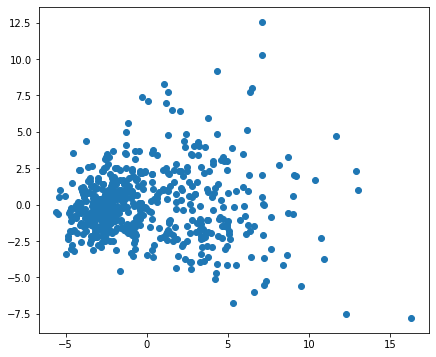

In [48]:
# Scatterplot of the components
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_pca['comp1'], cancer_pca['comp2']);


In [49]:

# Initialize an instance of the KMeans class from sklearn.
k = 2
model2 = KMeans(n_clusters=k, max_iter=3)
model2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
# Fit the instantiated model to our sliced dataframe
model2.fit(cancer_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign predicted clusters back to our dataframe
cancer_pca['cluster'] = model2.labels_


In [52]:
# Get our centroids
centroids2    =  model2.cluster_centers_
centroids2

array([[-2.20247773, -0.02171612],
       [ 4.35883027,  0.04297744]])

In [53]:
# turn them into a dataframe
cc2  =  pd.DataFrame(centroids2)
cc2.head()


,0,1
0,-2.202478,-0.021716
1,4.358830,0.042977


In [0]:
# Setup some colors for plotting
base_colors2  =  ['r', 'g']
colors2       =  [base_colors2[centroid] for centroid in model2.labels_]

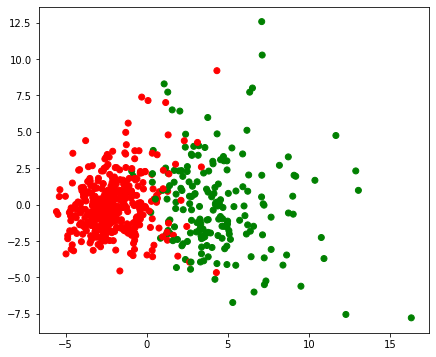

In [55]:

# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_pca['comp1'], cancer_pca['comp2'], c=colors)
ax.scatter(cc2[0], cc2[1], c=base_colors, s=100);

In [56]:
# what's our silhouette score?
metrics.silhouette_score(cancer_pca, model2.labels_, metric='euclidean')

0.5147831271866316

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

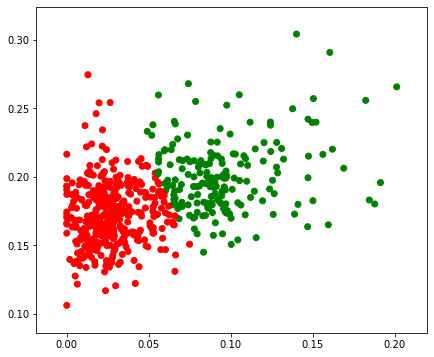

In [57]:
# Scatterplot without PCA
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_points[features[0]], cancer_points[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);



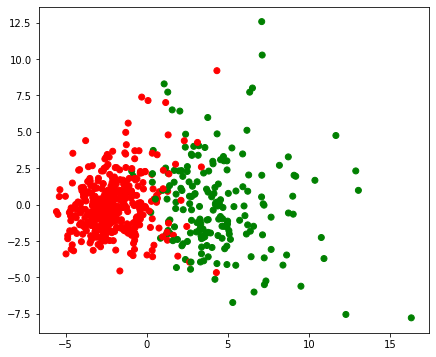

In [58]:
# Scatterplot WITH PCA

fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_pca['comp1'], cancer_pca['comp2'], c=colors)
ax.scatter(cc2[0], cc2[1], c=base_colors, s=100);


In [0]:
#Creating a DF for cluster prediction for PCA+KMeans data
cluster_pca=model2.labels_

In [0]:
#Adding column 'cluster' into the copied dataframe
df_copy['cluster_with_pca']= cluster_pca

In [61]:
result_with_pca=(df_copy['diagnosis']==df_copy['cluster_with_pca']).value_counts()
result_with_pca

True     516
False     53
dtype: int64

In [62]:
# Percentage of correct predictions
percentage_with_pca= result_with_pca[1]/df_copy.shape[0]
percentage_with_pca

0.9068541300527241

In [63]:
#Computing difference in accuracy
percentage_with_pca-percentage

0.01405975395430581

Based on the computation, the percentages are pretty close, with the result involving PCA scores 1% higher.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project